In [21]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pickle
from matplotlib.patches import Ellipse

In [22]:
y_size=1000
x_size=1400

In [23]:
def VisHMM(means,covars,transmat,start_p,ax=0,showim=1,stim=0,lengths=0,incol=False):
    '''
     visualize fixations and fitted hidden markov model
    hmmfitted: fitted hidden markov model
    ax: if not provided, new figure opens 

    
     Positional arguments
     ----------
    dat : sequence of fixations
    hmmfitted : fitted hmmlearn hidden markov model object

    
     Optional arguments
     ----------
    ax:  provide axis handle for the plot, if not new figure is opened The default is 0.
    showim : show stimulus if True The default is 1.
    stim : stimulus name
    lengths : length of time series sequences (needed for multiple sequences)
    incol : If True, use sequence of colorsm differing for each component. The default is False.

    Returns
    -------
    None.

    '''
    
    colors=['k','gray','salmon','olive','m','c','g','y','navy','orange','darkred','r','darkgreen','k','gray','salmon','olive','y','m','g','c']
    if type(ax)==int:
        fig,ax= plt.subplots()
  
    ax.scatter(means[:,0],means[:,1],color='darkred',s=50)
    
    for c1 in range(np.shape(means)[0]):
        if incol:
            color1=colors[c1]  # color for scatter 
            color2=colors[c1] # color for patch

        else:
            color1='k'
            color2='olive'

        #print(np.shape(hmmfitted.covars_[c1]))
       # draw_ellipse((hmmfitted.means_[c1,0],hmmfitted.means_[c1,1]),hmmfitted.covars_[c1],ax=ax,facecolor='none',edgecolor=color2,linewidth=2)
        draw_ellipse(means[c1,0],means[c1,1],covars[c1],ax=ax,facecolor='none',edgecolor=color2,linewidth=2)
        
        if start_p[c1]>.05 and means[c1,1]>0:
            ax.text(means[c1,0],means[c1,1],int(np.round(start_p[c1]*100)),color='gold')
        for c2 in range(np.shape(means)[0]):
            if c1!=c2:
                ax.plot([means[c1,0],means[c2,0]],[means[c1,1],means[c2,1]],linewidth=transmat[c1,c2]*2,color='r')
    ax.set_ylim([y_size,0])
    ax.set_xlim([0,x_size])
   # ax.set_yticks([])
   # ax.set_xticks([])   


In [24]:
def draw_ellipse(posx,posy, covariance, ax=None, facecolor='none',edgecolor='red',linewidth=2):
    """Draw an ellipse with a given position and covariance
    source:
    https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html """
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 2):
        ax.add_patch(Ellipse(np.array([posx,posy]), nsig * width, nsig * height,
                             angle=angle,facecolor=facecolor,edgecolor=edgecolor,linewidth=linewidth))

In [25]:
def GetDat(group, stim):
    fold = 1
    dir = "./hmm_models2/models_g"+group+"/models_g"+group+"_fold_"+str(fold)+"_stim_"+str(stim)+".pkl"
    with open(dir, 'rb') as f:
        data = pickle.load(f)
        mean=data.means_
        covar=data.covars_
        transmat=data.transmat_
        start_p=data.startprob_
    return mean,covar,transmat,start_p

In [26]:
stimuli=np.arange(1,31)

entropy_start=np.zeros((len(stimuli),2))
entropy_trans=np.zeros((len(stimuli),2))


In [27]:
for cs,s in enumerate(stimuli):
    for gr in range(2):
        mean,covar,transmat,start_p=GetDat(str(gr),s)
        entropy_start[cs,gr]=stats.entropy(start_p)
        entropy_trans[cs,gr]=np.nanmean(stats.entropy(transmat))

In [28]:
mean

array([[511.27232595, 366.64191895],
       [348.4018187 , 366.42050394],
       [929.94029159, 535.96942656],
       [145.36749827, 378.25527287],
       [608.20061905, 408.1798344 ],
       [615.20013363, 361.77444262],
       [434.77972715, 388.64902672],
       [263.97556938, 380.92349036]])

In [29]:
entropy_start

array([[0.64320662, 0.62448103],
       [0.44437204, 1.22371382],
       [0.45993717, 0.7104596 ],
       [0.40603643, 0.92585535],
       [0.43208147, 1.14208022],
       [0.36560493, 0.72889624],
       [1.05918646, 1.24513994],
       [0.76312158, 0.95358476],
       [0.983049  , 0.87244281],
       [0.67092646, 1.13132784],
       [0.91708637, 1.28601514],
       [0.40541568, 0.91003183],
       [0.64922043, 0.61899021],
       [1.05124644, 0.91363716],
       [1.00881507, 1.06964473],
       [0.81811946, 1.09432933],
       [0.79812707, 0.89769715],
       [0.58847339, 1.18096365],
       [0.84241482, 0.79632029],
       [0.52709287, 1.22688016],
       [0.54063889, 0.47422555],
       [1.01346019, 0.49861863],
       [0.93662397, 1.18528422],
       [0.67838428, 1.06095211],
       [0.58775255, 0.85011396],
       [0.53036112, 0.1931093 ],
       [1.34381563, 0.78036505],
       [0.49131792, 0.97996868],
       [0.56781837, 0.82011318],
       [0.97939568, 0.47430048]])

In [30]:
entropy_trans

array([[0.72576103, 0.75710135],
       [0.84313927, 0.78136047],
       [0.8159174 , 0.55107802],
       [0.73421586, 0.55236146],
       [0.61179571, 0.76443712],
       [0.7455741 , 0.51109871],
       [0.80282527, 0.65902883],
       [0.65856565, 0.6519808 ],
       [0.81678641, 0.75227355],
       [0.79819297, 0.63654819],
       [0.66711544, 0.86689559],
       [0.61388923, 0.55016819],
       [0.73658199, 0.56368248],
       [0.7114606 , 0.57942746],
       [0.60747231, 0.55724648],
       [0.75066798, 0.71158024],
       [0.65608672, 0.61697155],
       [0.63999981, 0.56925922],
       [0.74361733, 0.69665052],
       [0.70800375, 0.61232353],
       [0.72106288, 0.54430475],
       [0.71718874, 0.74543152],
       [0.68894346, 0.72720981],
       [0.71159602, 0.68697952],
       [0.78737285, 0.52045375],
       [0.7135438 , 0.42835116],
       [0.7376079 , 0.5577476 ],
       [0.78454009, 0.54861227],
       [0.78945263, 0.75229724],
       [0.74834169, 0.57409944]])

In [31]:
np.mean(entropy_start,0)

array([0.71677008, 0.89565141])

In [32]:
np.mean(entropy_trans,0)

array([0.72624396, 0.63423203])

In [33]:
stats.ttest_ind(entropy_start[:30,0],entropy_start[:30,1])

TtestResult(statistic=-2.6545528573979738, pvalue=0.010233192057979198, df=58.0)

In [34]:
stats.ttest_ind(entropy_trans[:,0],entropy_trans[:,1])

TtestResult(statistic=4.1772736129084596, pvalue=0.00010050364831633728, df=58.0)

In [36]:
stats.ttest_rel(entropy_trans[:,0],entropy_trans[:,1])

TtestResult(statistic=4.2751330986179905, pvalue=0.00018867204955106098, df=29)

---

In [95]:
all_trans=np.zeros((len(stimuli),2,8,8))
for cs,s in enumerate(stimuli):
    for gr in range(2):
        mean,covar,transmat,start_p=GetDat(str(gr),s)
        all_trans[cs,gr]=transmat

In [75]:
np.shape(all_trans[:,0])

(30, 8, 8)

In [76]:
mean_matrix = np.mean(all_trans[:,0], axis=0)
mean_matrix2 = mean_matrix.copy()
plot1=mean_matrix.copy()
np.fill_diagonal(mean_matrix2, np.nan)

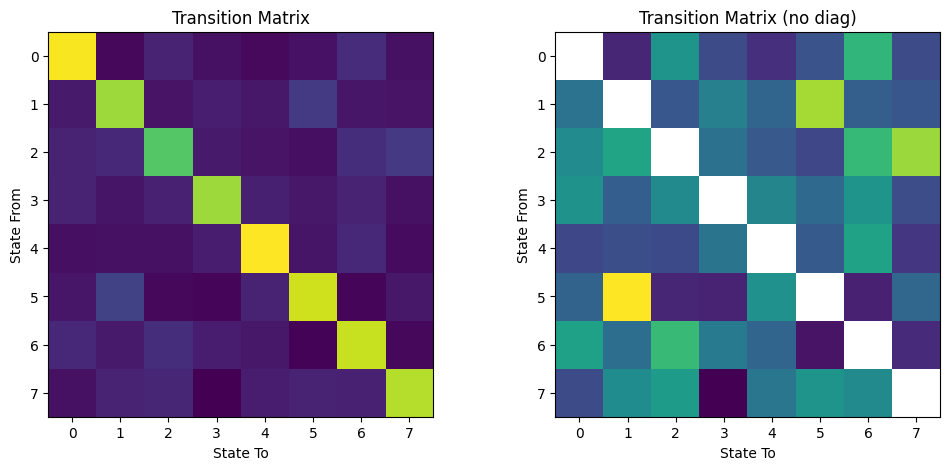

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.imshow(mean_matrix, cmap='viridis')
ax1.set_title('Transition Matrix')
ax2.imshow(mean_matrix2, cmap='viridis')
ax2.set_title('Transition Matrix (no diag)')
for ax in (ax1, ax2):
    ax.set_xlabel('State To')
    ax.set_ylabel('State From')

In [149]:
def top_k_per_row(A, k=3, normalize=True):

    topk = {}
    for i in range(len(A)):
        row = A[i]
        idx_sorted = np.argsort(row)[::-1]
        top_idx = idx_sorted[:k]
        top_probs = row[top_idx]
        entries = list(zip(top_idx.tolist(), top_probs.tolist()))
        topk[i] = entries

        items = ", ".join(f"{dst} ({prob:.6f})" for dst, prob in entries)
        print(f"State {i}: {items}")


In [150]:
top_k_per_row(mean_matrix, k=3)

State 0: 0 (0.648967), 6 (0.094491), 2 (0.076614)
State 1: 1 (0.560364), 5 (0.120489), 3 (0.066218)
State 2: 2 (0.485199), 7 (0.118281), 6 (0.095635)
State 3: 3 (0.561612), 6 (0.076653), 0 (0.075596)
State 4: 4 (0.655885), 6 (0.083913), 3 (0.060298)
State 5: 5 (0.610352), 1 (0.137157), 4 (0.075340)
State 6: 6 (0.601357), 2 (0.097003), 0 (0.083544)
State 7: 7 (0.585153), 2 (0.080644), 5 (0.076571)


---

In [78]:
mean_matrix = np.mean(all_trans[:,1], axis=0)
mean_matrix2 = mean_matrix.copy()
plot2=mean_matrix.copy()
np.fill_diagonal(mean_matrix2, np.nan)

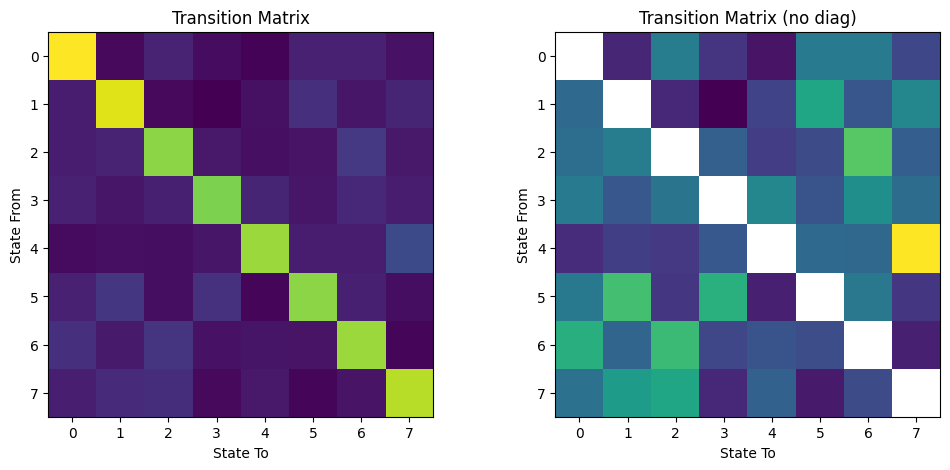

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.imshow(mean_matrix, cmap='viridis')
ax1.set_title('Transition Matrix')
ax2.imshow(mean_matrix2, cmap='viridis')
ax2.set_title('Transition Matrix (no diag)')
for ax in (ax1, ax2):
    ax.set_xlabel('State To')
    ax.set_ylabel('State From')

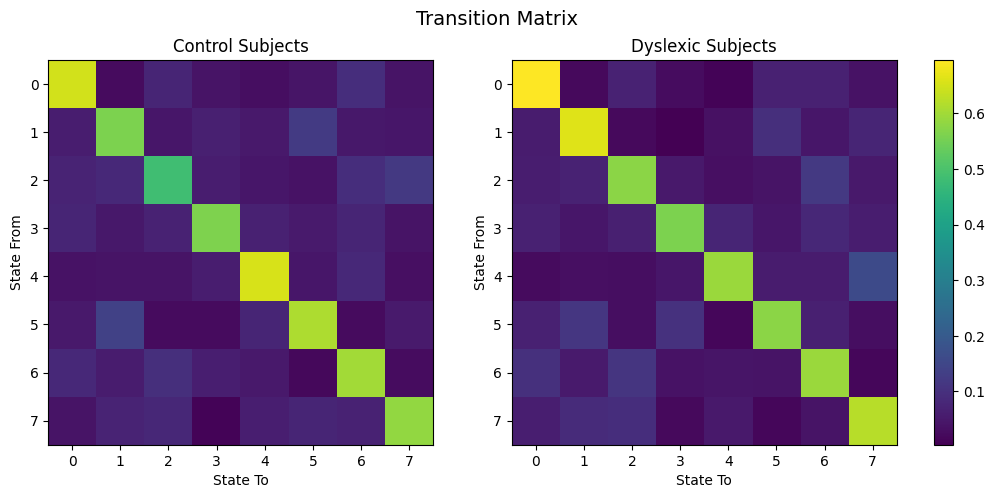

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Transition Matrix", fontsize=14)
vmin = min(plot1.min(), plot2.min())
vmax = max(plot1.max(), plot2.max())
im1 = ax1.imshow(plot1, cmap='viridis', vmin=vmin, vmax=vmax)
ax1.set_title('Control Subjects')
im2 = ax2.imshow(plot2, cmap='viridis', vmin=vmin, vmax=vmax)
ax2.set_title('Dyslexic Subjects')
for ax in (ax1, ax2):
    ax.set_xlabel('State To')
    ax.set_ylabel('State From')
fig.colorbar(im1, ax=[ax1, ax2], fraction=0.046, pad=0.04)
plt.show()

In [132]:
x = all_trans.copy()

In [133]:
n = []
for m in x[:10,0]:
    n.append(np.nanstd(m))

print(np.mean(n))
print(np.std(n))

n = []
for m in x[:10,1]:
    n.append(np.nanstd(m))
    
print(np.mean(n))
print(np.std(n))

0.2466088552962086
0.005593075345656273
0.26775322167743665
0.011760609902858394


In [134]:
stats.ttest_rel(entropy_trans[:10,0],entropy_trans[:10,1])

TtestResult(statistic=2.293172807526523, pvalue=0.04752732583739801, df=9)

In [99]:
n = []
for m in x[10:20,0]:
    n.append(np.nanstd(m))

print(np.mean(n))
print(np.std(n))

n = []
for m in x[10:20,1]:
    n.append(np.nanstd(m))
    
print(np.mean(n))
print(np.std(n))

0.2572126523850952
0.0067098875221110734
0.26749107802131944
0.010394949769887214


In [100]:
n = []
for m in x[20:30,0]:
    n.append(np.nanstd(m))

print(np.mean(n))
print(np.std(n))

n = []
for m in x[20:30,1]:
    n.append(np.nanstd(m))
    
print(np.mean(n))
print(np.std(n))

0.25015617192635264
0.01230097152150741
0.26538978394792573
0.013059776044933278


In [136]:
stats.ttest_rel(entropy_trans[20:30,0],entropy_trans[20:30,1])

TtestResult(statistic=3.4090734304606403, pvalue=0.007760993203103428, df=9)

In [101]:
n = []
for m in x[:20,0]:
    n.append(np.nanstd(m))

print(np.mean(n))
print(np.std(n))

n = []
for m in x[:20,1]:
    n.append(np.nanstd(m))
    
print(np.mean(n))
print(np.std(n))

0.25191075384065187
0.008140188533833538
0.267622149849378
0.011099578497715814


In [102]:
n = []
for m in x[:,0]:
    n.append(np.nanmean(np.diag(m)))

print(np.mean(n))
print(np.std(n))

n = []
for m in x[:,1]:
    n.append(np.nanmean(np.diag(m)))
    
print(np.mean(n))
print(np.std(n))

0.588610970028199
0.08566251265973761
0.6099816382975795
0.1050921388925291


---

In [158]:
GRM=pd.read_csv("C:/Users/Utente/Documents/University/Courses/P1&P2/EyeMovementDat/merged.csv")

C:\Users\Utente\AppData\Local\Temp\ipykernel_34104\888458120.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  GRM=pd.read_csv("C:/Users/Utente/Documents/University/Courses/P1&P2/EyeMovementDat/merged.csv")


In [159]:
list(GRM)

['subject',
 'stimulus',
 'start_time',
 'end_time',
 'duration_ms',
 'fix_x',
 'fix_y',
 'practice',
 'repetition',
 'record_number',
 'Group',
 'GroupName']

In [160]:
GRM.subject.unique()

array(['P212', 'P215', 'P221', 'P225', 'P247', 'P270', 'P275', 'P294',
       'P106', 'P112', 'P113', 'P121', 'P141', 'P153', 'P154', 'P16',
       'P32', 'P37', 'P54', 'P84', 'P86', 'P88', 'P98', 'P99', '21498',
       '21513', '21629', '21636', '21667', '21706', '21862', '21939',
       '22129', '22138', '22219', '22239', '22322', '22327', '22341',
       '22394', '22468', '22472', '22551', '22552', '22557', '22565',
       '22618', '22640', '22712', '22779', '22828', '22874', '22923',
       '22925', '22952', '22958', 'P231', 'P252', 'P258', 'P263', 'P268',
       'P102', 'P110', 'P114', 'P138', 'P139', 'P158', 'P187', 'P190',
       'P194', 'P202', 'P208', 'P36', 'P41', 'P85', 'P90', 'P94', '21418',
       '21469', '21526', '21630', '21658', '21683', '21699', '21811',
       '21819', '21889', '21927', '21946', '22168', '22181', '22204',
       '22234', '22279', '22291', '22378', '22464', '22508', '22667',
       '22691', '22692', '22729', '22783', '22818', '22900', '22929',
       

In [161]:
GrazDat=GRM.loc[GRM.subject.str.contains("P")==True,:]
GrazDat=GrazDat[GrazDat.Group.isna()==False].reset_index()

In [162]:
MunichDat=GRM.loc[GRM.subject.str.contains("P")==False,:].reset_index()

In [163]:
GrazDat["dyslexia"]=0
GrazDat.loc[GrazDat.Group<3,"dyslexia"]=1
MunichDat["dyslexia"]=0
MunichDat.loc[MunichDat.Group<3,"dyslexia"]=1

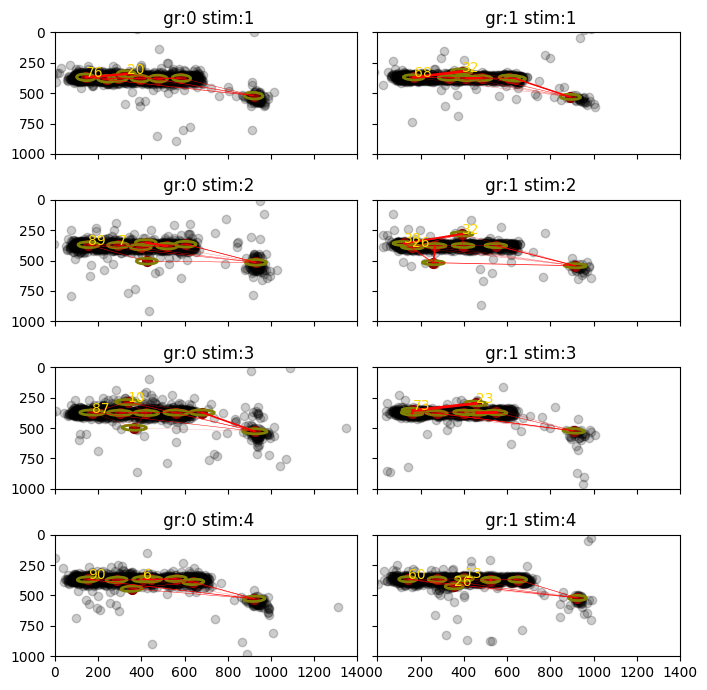

In [164]:
stimid=np.arange(1,5)
fig,ax=plt.subplots(ncols=2,nrows=4,sharex=True,sharey=True,figsize=(7,7))
#ax=ax.flatten()
for cs,s in enumerate(stimid):
    for gr in range(2):
        
        dIdx=(GrazDat.stimulus==s) & (GrazDat.dyslexia==gr)
        x,y=GrazDat.fix_x[dIdx],GrazDat.fix_y[dIdx]
        mean,covar,transmat,start_p=GetDat(str(gr),s)
        ax[cs,gr].scatter(x,y,color='k',alpha=.2)
        VisHMM(mean,covar,transmat,start_p,ax=ax[cs,gr])
        ax[cs,gr].set_title(' gr:'+str(gr)+' stim:'+str(s))
plt.tight_layout()

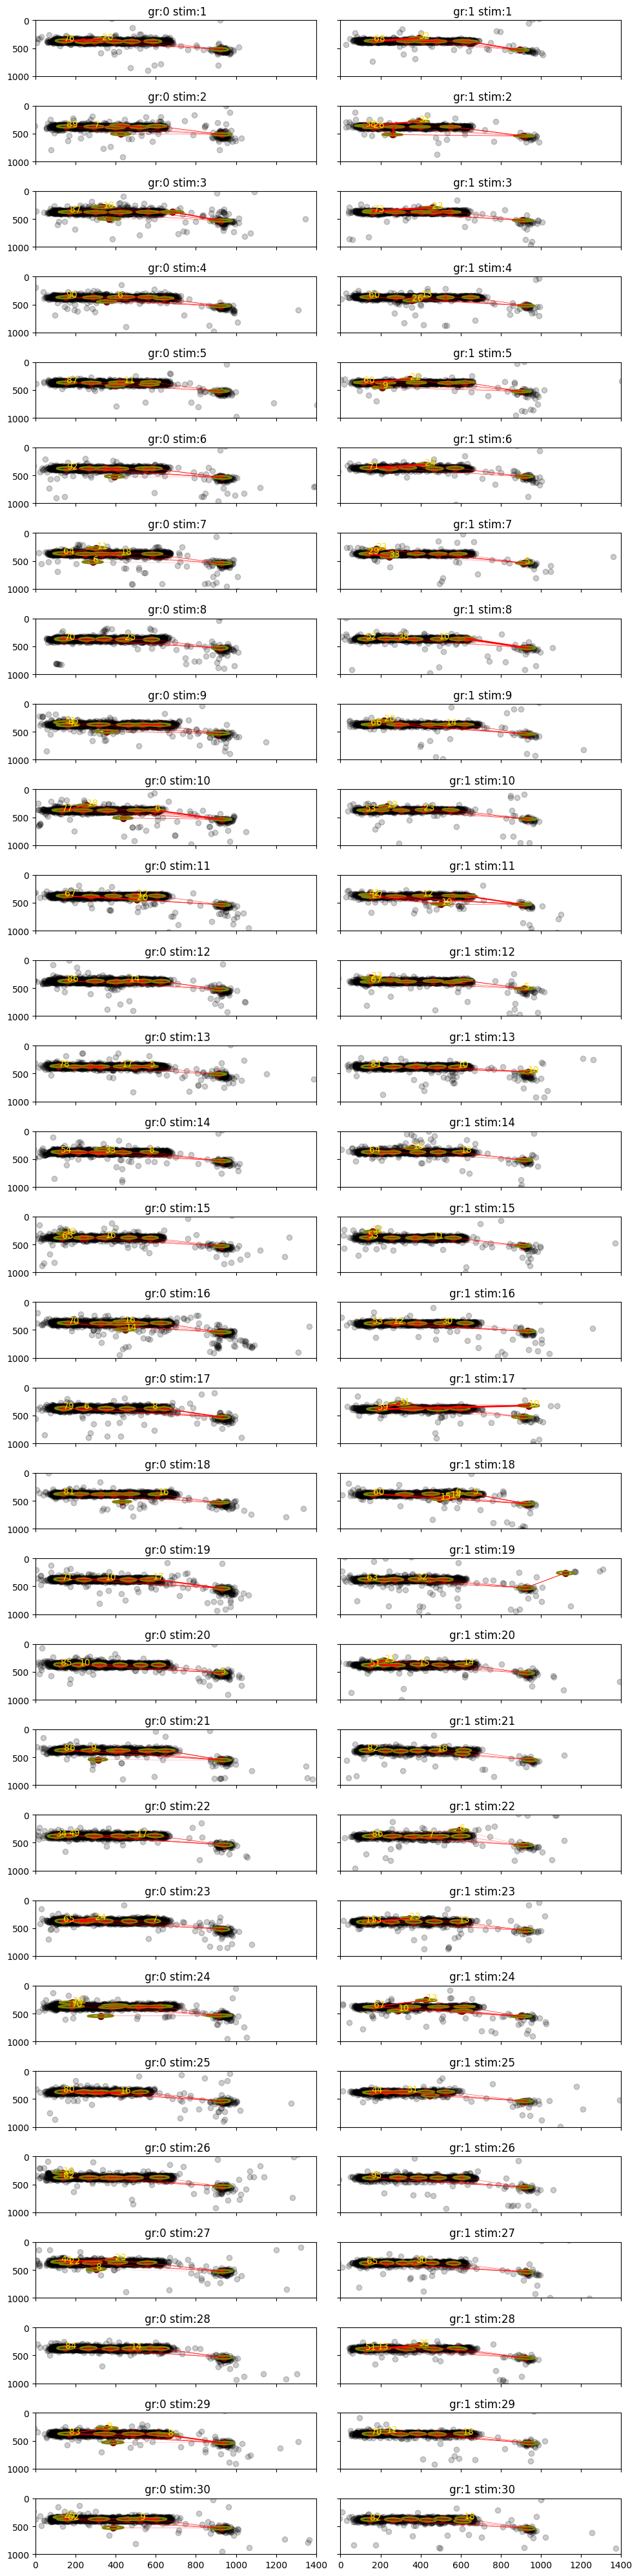

In [167]:
stimid=np.arange(1,31)
fig,ax=plt.subplots(ncols=2,nrows=30,sharex=True,sharey=True,figsize=(10,40))
for cs,s in enumerate(stimid):
    for gr in range(2):
        
        dIdx=(GrazDat.stimulus==s) & (GrazDat.dyslexia==gr)
        x,y=GrazDat.fix_x[dIdx],GrazDat.fix_y[dIdx]
        mean,covar,transmat,start_p=GetDat(str(gr),s)
        ax[cs,gr].scatter(x,y,color='k',alpha=.2)
        VisHMM(mean,covar,transmat,start_p,ax=ax[cs,gr])
        ax[cs,gr].set_title(' gr:'+str(gr)+' stim:'+str(s))
plt.tight_layout()